In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

In [2]:
movie_data = pd.read_csv('transformed_movie_data6.csv')

In [3]:
movie_data['Date'] = pd.to_datetime(movie_data['Date'])

In [4]:
movie_data.set_index('Date', inplace=True)

In [8]:
movie_data.index = pd.date_range(start=movie_data.index[0], periods=len(movie_data), freq='MS')

In [10]:
movie_data = movie_data.sort_index()

In [11]:
endog = movie_data['Opening']

In [12]:
model = SimpleExpSmoothing(endog)
fit_model = model.fit()

In [13]:
predictions = fit_model.predict(start=endog.index[0], end=endog.index[-1])

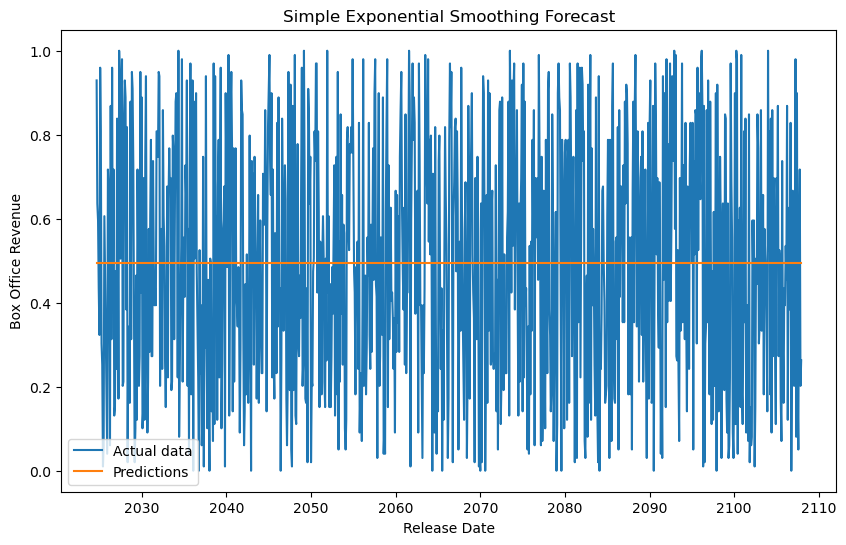

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(endog.index, endog.values, label='Actual data')
plt.plot(predictions.index, predictions.values, label='Predictions')
plt.xlabel('Release Date')
plt.ylabel('Box Office Revenue')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()